# Decoding Neuraly Relevant Information from the Shape of the Hemodynamic Response
A walk-through the three neuromimaging data sets acquired during my PhD.

This documentation is not prospective (constructed as the work unfolds) but retrospective (at a stage close to classic publication). Yes, shame on me.

I am therefore constructing this documentation backward, from the highly processed data of final figures back toward the raw data. Note that I may never get to the raw data due to time constrains, so many projects, this imperfect current system of scholarly publishing and you know, life.

## Brain Decoding of Visual Stimulus Orientation With Cyclical Stimulus Paradigm

Stimuli were presented at one of two orthogonal orientations (+/- 45 degrees) in alternating 6-sec ON and 6-sec OFF blocs. This produced sinusoidal BOLD signal variations in V1 cortex.

## Fit the sinusoidal brain response


In [11]:
clear all
addpath(genpath(fullfile(pwd,'matlabFun')))

Please get the data from the repo if not done already
data repo: C:\Users\sebas\OneDrive - McGill University\dataBig
IN: anatomical V1 roi (C-derived\DecodingHR\anat\z)
IN: preprocessed functionals (C-derived\DecodingHR\fun\x)
IN: stimulus timing (B-clean\DecodingHR\stim\160118_cyclicStim\data)
F(IN)=OUT: 2-df sinusoidal fit to single voxel time series
OUT: fit params and stats + HRF estimates (C-derived\DecodingHR\fun\y)
Not actually running because way too long



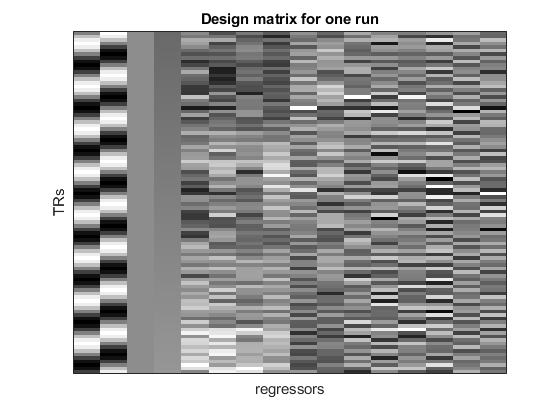

In [12]:
runFit

Not actually running to save some time
IN: anatomical V1 roi (C-derived\DecodingHR\anat\z)
IN: voxel visual field eccentricity (C-derived\DecodingHR\anat\z)
IN: sinusoidal fit results (C-derived\DecodingHR\fun\y)
F(IN)=OUT: masks the fit according to voxel eccentricity and activation level
Figures are additionally thresholded for activation level, but not the data that is saved!
OUT: sinusoidal fit results (C-derived\DecodingHR\fun\zSin)



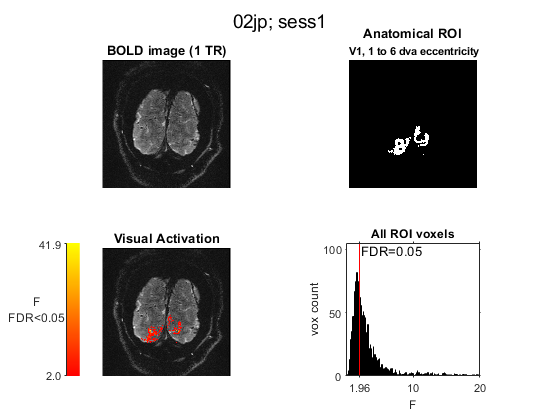

In [13]:
threshType = 'fdr'; % 'none', 'p' or 'fdr'
maskSinAndHrFit(threshType)

IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived\DecodingHR\zSin)
F(IN)=OUT: threshold included voxels and analyse responses averaged across the ROI
OUT: figures and stats
---------------
Cartesian Space
---------------
Ori vs Plaid:
Hotelling's T^2 multivariate test
 T^2=7.16
 p=0.17
Ori1 vs Ori2:
 Hotelling's T^2 multivariate test
 T^2=1.39; p=0.61
---------------
Polar Amplitude
---------------
Ori vs Plaid:
 Student's t-test
 t=0.96; p=0.38
 Wilcoxon signed rank test
 signed rank=14.00; p=0.56
Ori1 vs Ori2:
 Student's t-test
 t=0.89; p=0.41
 Wilcoxon signed rank test
 signed rank=15.00; p=0.44
-----------
Polar Delay
-----------
Ori vs Plaid:
 Student's t-test
 t=3.92; p=0.01
 Wilcoxon signed rank test
 signed rank=21.00; p=0.03
 Hotelling's test for angular means
 F=21.00; p=0.06
Ori1 vs Ori2:
 Student's t-test
 t=0.17; p=0.87
 Wilcoxon signed rank test
 signed rank=12.00; p=0.84
 Hotelling's test for angular means
 F=12.00; p=0.64



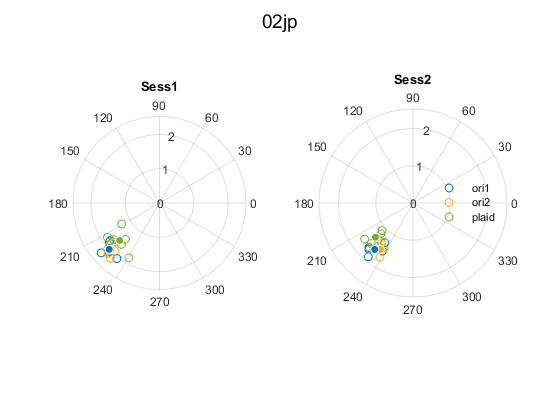

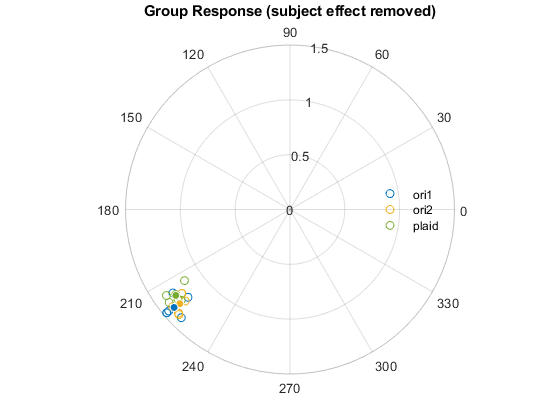

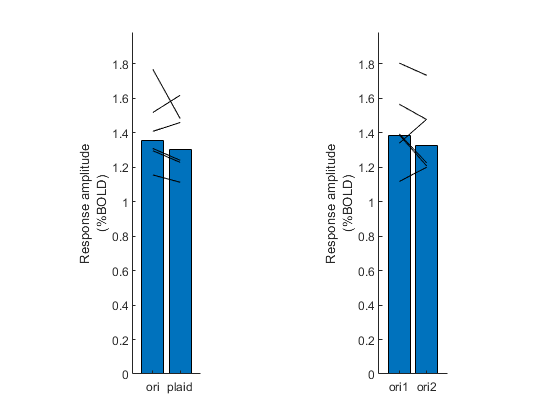

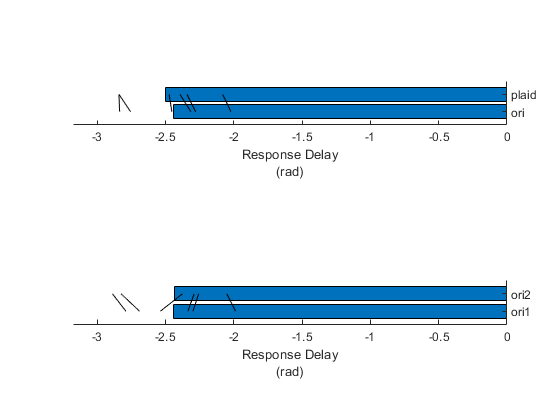

In [14]:
sinusoidalGroupAnalysis(threshType)

IN: BOLD hemodynamic responses (HR) from anatomical V1 ROI (C-derived\DecodingHR\zHr)
F(IN)->OUT: threshold included voxels and analyse HR averaged across the ROI
OUT: figures



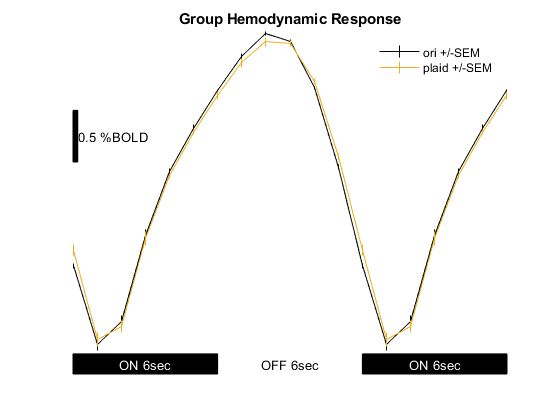

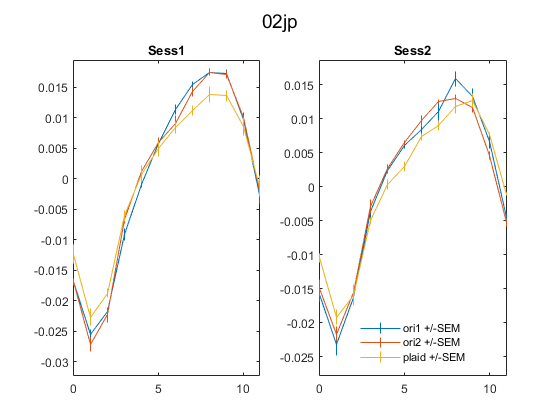

In [15]:
hrGroupAnalysis(threshType)

## Now the decoding

In [16]:
res.amp = runDecoding('fdr','cartRealFixedDelay');
res.ampAtPeak = runDecoding('fdr','cartReal');
res.mag = runDecoding('fdr','polMag');
res.delay = runDecoding('fdr','polDelay');

IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived\DecodingHR\zSin)
F(IN)=OUT: threshold included voxels and decode ROI response pattern to predict stimulus orientation
OUT: figures and stats (C-derived\DecodingHR\zSin)
---
SVM space: cartRealFixedDelay; Vox selection: fdr
Group accuracy = 72/144 (50.0%; binomial p=0.467)
IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived\DecodingHR\zSin)
F(IN)=OUT: threshold included voxels and decode ROI response pattern to predict stimulus orientation
OUT: figures and stats (C-derived\DecodingHR\zSin)
---
SVM space: cartReal; Vox selection: fdr
Group accuracy = 81/144 (56.3%; binomial p=0.057)
IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived\DecodingHR\zSin)
F(IN)=OUT: threshold included voxels and decode ROI response pattern to predict stimulus orientation
OUT: figures and stats (C-derived\DecodingHR\zSin)
---
SVM space: polMag; Vox selection: fdr
Group accuracy = 83/144 (57.6%; binomial p=0.027)
IN: Sinusoi

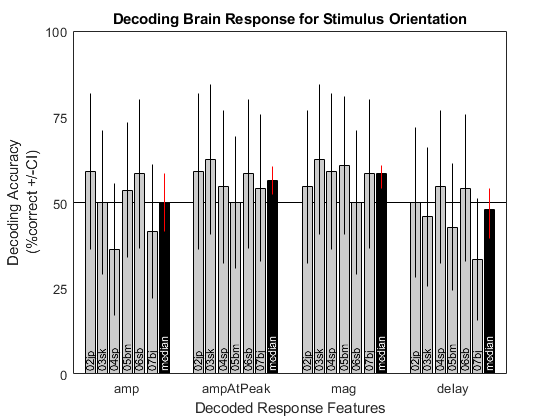

In [19]:
plotDecoding(res)